# Kaggle Competition - Titanic Passenger Survivability.
### Analyses & classification forecast for *Titanic Passengers*.
##### From exploratory data analysis, EDA, to hypothesis proposal, througth data preparation, ending up with evaluation of some classification algorithms' machine learning.

Author: Adam S. Barreto Malcher

![Titanic](https://wallpapercave.com/wp/aJ0v9Md.jpg)

As one of mustly famous machine learning competition on [Kaggle](https://kaggle.com), [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) is a great start to test your data science and machine learning skills that you already gathered, like data handle, statistical analysis, data transformation and classification algorithms.

Thus I'm writing this posts series, starting with the very first steps as data loading, get a simple data understand to choose which algorithm could get used, and make the initial predictions and some validations too. In the following parts of this series will be presented more refined details to apply on algorithm.

The goal there is predict which passenger "will" survive or die during Titanic's wreck. To accomplish the task, it's given two separetade dataset, one with labeled data for training the algorithms, and other with labeled to test them.

**Even though it says 'predict', we're dealing with a classification problem (survived, yes or no?), get it in mind while designing the solution.**

With this dataset, we're handling with 891 trainning observations and 418 test's observations, totalizing 1309 observations. The columns on dataset are:
* *PassengerId:* An unique identifier to the passenger;
* *Survived:* Indicates which passenger had survived, 1 to yes, 0 to no;
* *Pclass (Passenger class):* It is a "label" to designate 1 of the 3 passenger classes;
* *Name:* Passenger name;
* *Sex:* Passenger sex;
* *Age:* Passenger age;
* *SibSp:* Number of siblings and/or spouses aboard with passenger;
* *Parch:* Number of parents and/or children aboard with passenger;
* *Ticket:* Passenger ticket number;
* *Fare:* Fare paid;
* *Cabin:* Passenger cabin;
* *Embarked:* Embarkation port, C for Cherbourg, Q means Queenstown and S to Southampton.

Files can be find and downloaded at [here](https://www.kaggle.com/c/titanic/data).

## Preparing the data analysis environment.

### Loading libraries.
I'm using **Python** as programming language, it's easy to learn and understand once coded, free, and have a large adoption on data science field.
The initial packages used on this article are:
* [numpy](https://numpy.org): It's a Python package with the purpose of manipulating multidimensional arrays;
* [pandas](https://pandas.pydata.org): Is package that "extends" numpy, whats means it's has the already detailed features of numpy, plus it has additional functions, to help with data analysis and handle.
* [matplotlib](https://matplotlib.org): Matplotlib is a vastily used visualization package's, for wide range purpose;
* [seaborn](https://seaborn.pydata.org): Used for enhanced statistical visualization;
* [phik](https://phik.readthedocs.io/en/latest): Is a package to calculate correlation type, that isn't defaulted available on *pandas*, between dataset variables.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as srn

# aditional tool
import phik

Let's set some properties that'll make plots get a better look.

In [2]:
# Fixing plot ouput
%matplotlib inline
srn.set(style='whitegrid',color_codes=True)

## Understanding the data.

### Data load.

Here we gona to start. Let's create 2 pandas dataframe (which is a object who inherent many functionalities to handle and analyse data) one will store the training dataset and other the test dataset. Before that, must be specified where pandas will find the datasets shall get used. Then calling training  dataset to get first overview about it.

*Note: Set the path to where your files is stored*.

In [3]:
train = '../../data/train.csv'
test = '../../data/test.csv'
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Some more details.
Let's call dataframe's function *'info()'*, that shows how many indexes it has, and returning column by column its names, how many row in each column doesn't is null and type of the data in that column. At the botton show an "inventory" of how many columns are of each type found during function running and its memory usage.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataframe structure has 2 float columns (Age, Fare), 5 int (PassengerID, Survived, Pclass, SibSp, Parch) and 5 object (Name, Sex, Ticket, Cabin, Embarked). Other information, it's shows that Age has 177 null values on it, Cabin 687 null values and Embarked had 2 null values.

*Note: **object** type is defined when pandas infer on data column and find texts in it, or it can't define a specific type on data.*

For basic statistical analysis, lets removes the columns *'PassengerId'*, *'Name'* and *'Ticket'* from training dataset, once they're identifiers and don't grant any gain to model. To complete this, we apply the function *'drop'* with *'columns'* argument to indicate which ones will be removed', and *'inplace'* argument to make this change on memory.

In [5]:
df_train.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


On test dataset, *'PassengerId'* is used to measure algorithm accuraccy, when we submit our forecasts to **Kaggle**.

Now maybe I must remember you, this post is the start point of a series, so it will bring only one more step before code the algorithm. In the next posts we'll increment analysis, as also algorithm modeling.

The next step is a plot to verify which are the relationship between dataset columns, highlighting it using the *'Survived'* column throught argument *'hue'* on **Seaborn** function *'pairplot'*.

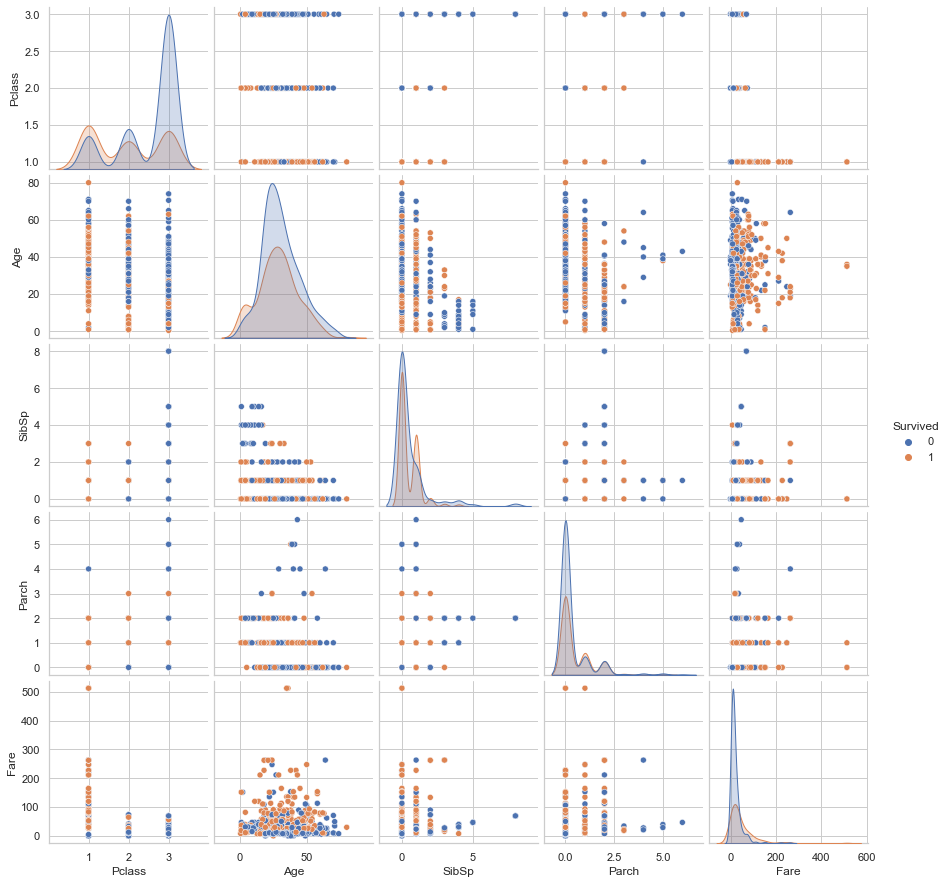

In [6]:
srn.pairplot(df_train,hue='Survived')

This visualization show us that aren't relevant linear relationships between dataset columns. So its indicate us that we couldn't use any linear models. But, for pragmatic exemple we use one, asides from the algorithm that will be used.

In [ ]:
### Fists forecasts